# Exploratory Data Analysis (EDA) - California Housing Dataset

This notebook performs exploratory data analysis on the California Housing dataset to understand the data structure, distributions, and relationships between features.

**Dataset**: California Housing Prices  
**Source**: sklearn.datasets  
**Target**: Median house value (in hundreds of thousands of dollars)  
**Date**: 2025

---

## 1. Setup

Import all necessary libraries for data analysis and visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style and figure size defaults
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 1.4.2
NumPy version: 1.21.5


## 2. Load Data

Load the California Housing dataset from the raw data directory.

In [2]:
# Load the dataset
data_path = '../raw/california_housing_raw.csv'
df = pd.read_csv(data_path, index_col=0)

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns)}")

Dataset loaded successfully!
Dataset shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']


## 3. Initial Inspection

Get a comprehensive overview of the dataset structure, data types, and basic statistics.

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print("=" * 50)
df.head()

First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Display data types and non-null counts
print("Dataset Information:")
print("=" * 30)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [5]:
# Display summary statistics
print("Summary Statistics:")
print("=" * 30)
df.describe()

Summary Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Feature Descriptions:

- **MedInc**: Median income in block group (in tens of thousands)
- **HouseAge**: Median house age in block group
- **AveRooms**: Average number of rooms per household
- **AveBedrms**: Average number of bedrooms per household
- **Population**: Block group population
- **AveOccup**: Average number of household members
- **Latitude**: Block group latitude
- **Longitude**: Block group longitude
- **target**: Median house value (in hundreds of thousands of dollars)

## 4. Missing Values Analysis

Check for missing values in the dataset and analyze their distribution.

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})

print("Missing Values Summary:")
print("=" * 30)
print(missing_summary)

# Check if there are any missing values
total_missing = missing_values.sum()
print(f"\nTotal missing values in dataset: {total_missing}")

if total_missing == 0:
    print("✅ Great! No missing values found in the dataset.")
else:
    print("⚠️  Missing values detected. Further investigation needed.")

Missing Values Summary:
            Missing_Count  Missing_Percentage
MedInc                  0                 0.0
HouseAge                0                 0.0
AveRooms                0                 0.0
AveBedrms               0                 0.0
Population              0                 0.0
AveOccup                0                 0.0
Latitude                0                 0.0
Longitude               0                 0.0
target                  0                 0.0

Total missing values in dataset: 0
✅ Great! No missing values found in the dataset.


## 5. Data Visualization

Visualize the data to understand distributions, relationships, and patterns.

### 5.1 Distribution Analysis - Histograms

Examine the distribution of all numerical features using histograms.

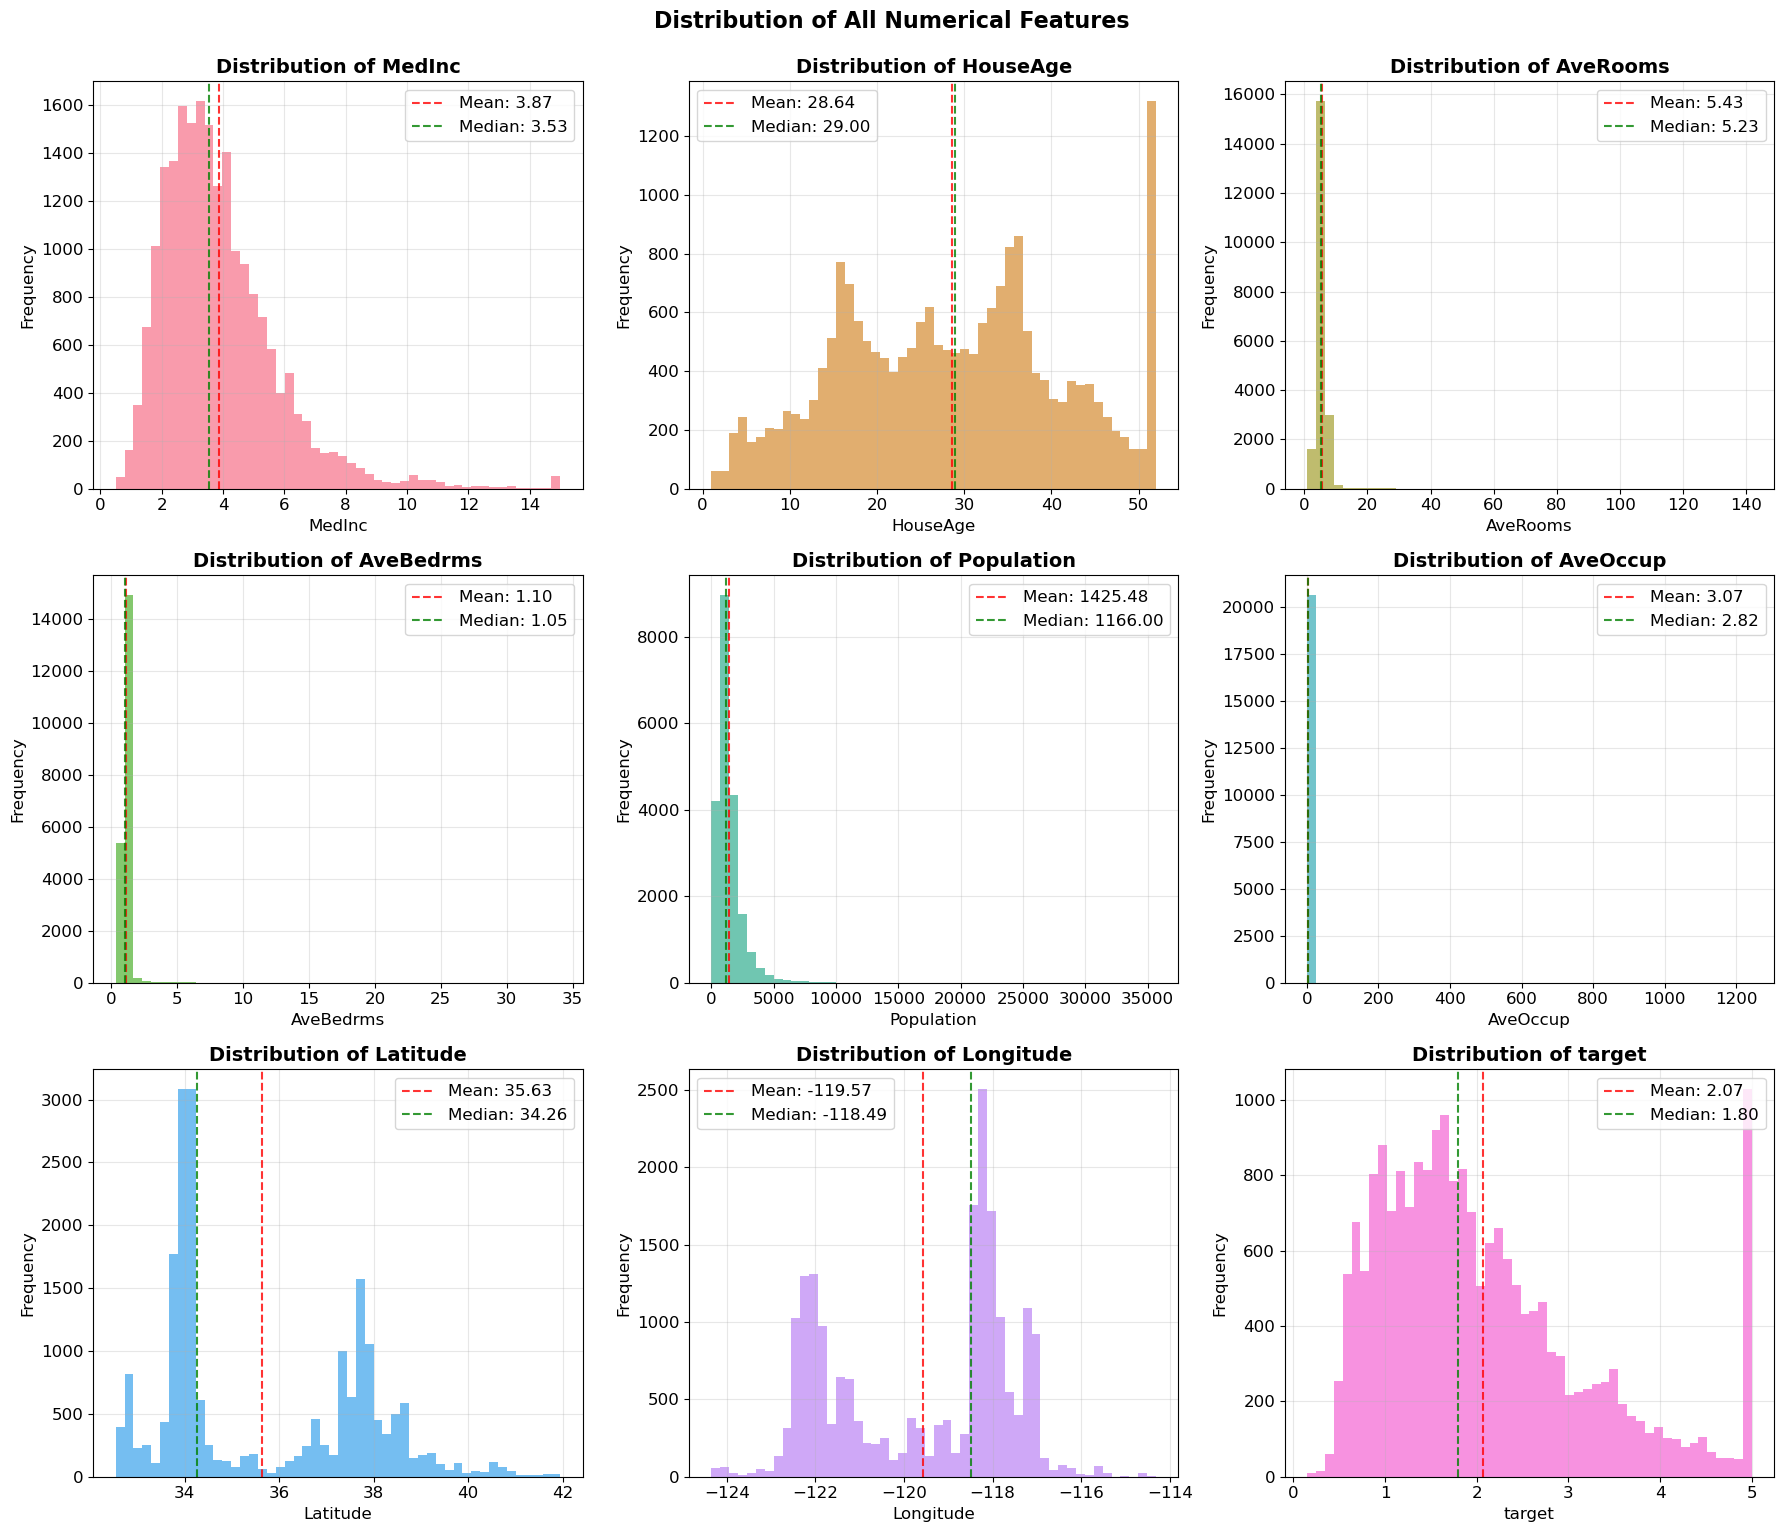


📊 Distribution Observations:
MedInc: Skewness = 1.65 (Right-skewed)
HouseAge: Skewness = 0.06 (Approximately normal)
AveRooms: Skewness = 20.70 (Right-skewed)
AveBedrms: Skewness = 31.32 (Right-skewed)
Population: Skewness = 4.94 (Right-skewed)
AveOccup: Skewness = 97.64 (Right-skewed)
Latitude: Skewness = 0.47 (Approximately normal)
Longitude: Skewness = -0.30 (Approximately normal)
target: Skewness = 0.98 (Right-skewed)


In [7]:
# Create histograms for all numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# Get all numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=50, alpha=0.7, color=sns.color_palette("husl", len(numerical_cols))[idx])
    axes[idx].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)
    
    # Add basic statistics as text
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.suptitle('Distribution of All Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Print observations
print("\n📊 Distribution Observations:")
print("=" * 40)
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"{col}: Skewness = {skewness:.2f} ({'Right-skewed' if skewness > 0.5 else 'Left-skewed' if skewness < -0.5 else 'Approximately normal'})")

### 5.2 Feature Relationships - Correlation Heatmap

Analyze the linear relationships between all features using a correlation matrix.

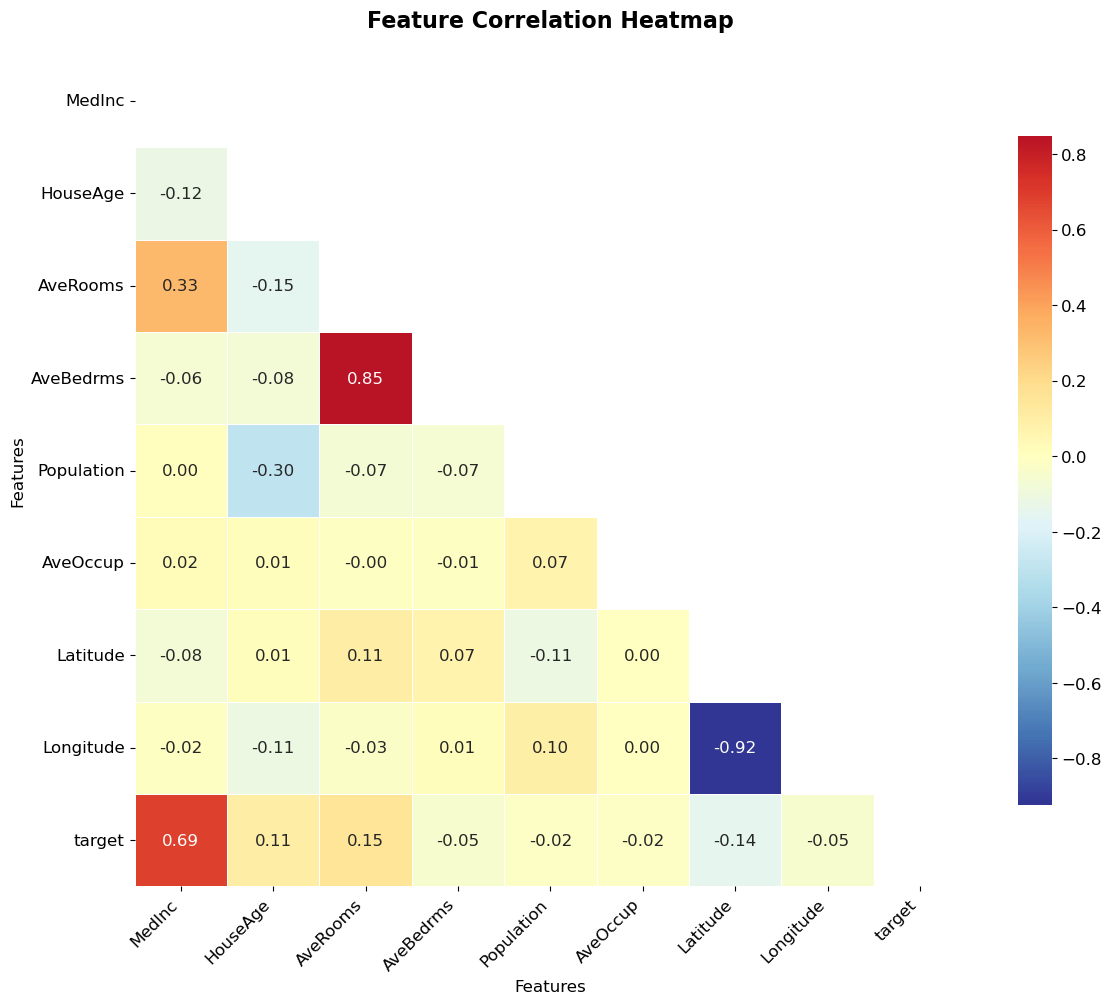


🎯 Strongest Correlations with Target Variable:
MedInc: 0.688 (Positive)
AveRooms: 0.152 (Positive)
Latitude: 0.144 (Negative)
HouseAge: 0.106 (Positive)
AveBedrms: 0.047 (Negative)
Longitude: 0.046 (Negative)
Population: 0.025 (Negative)
AveOccup: 0.024 (Negative)


In [8]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

heatmap = sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='RdYlBu_r',
    center=0,
    square=True,
    linewidths=0.5,
    fmt='.2f',
    cbar_kws={"shrink": .8}
)

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identify strongest correlations with target
target_correlations = correlation_matrix['target'].abs().sort_values(ascending=False)
print("\n🎯 Strongest Correlations with Target Variable:")
print("=" * 50)
for feature, corr in target_correlations.items():
    if feature != 'target':
        direction = "Positive" if correlation_matrix['target'][feature] > 0 else "Negative"
        print(f"{feature}: {corr:.3f} ({direction})")

### 5.3 Geographical Distribution

Visualize the geographical distribution of data points using Latitude and Longitude coordinates.

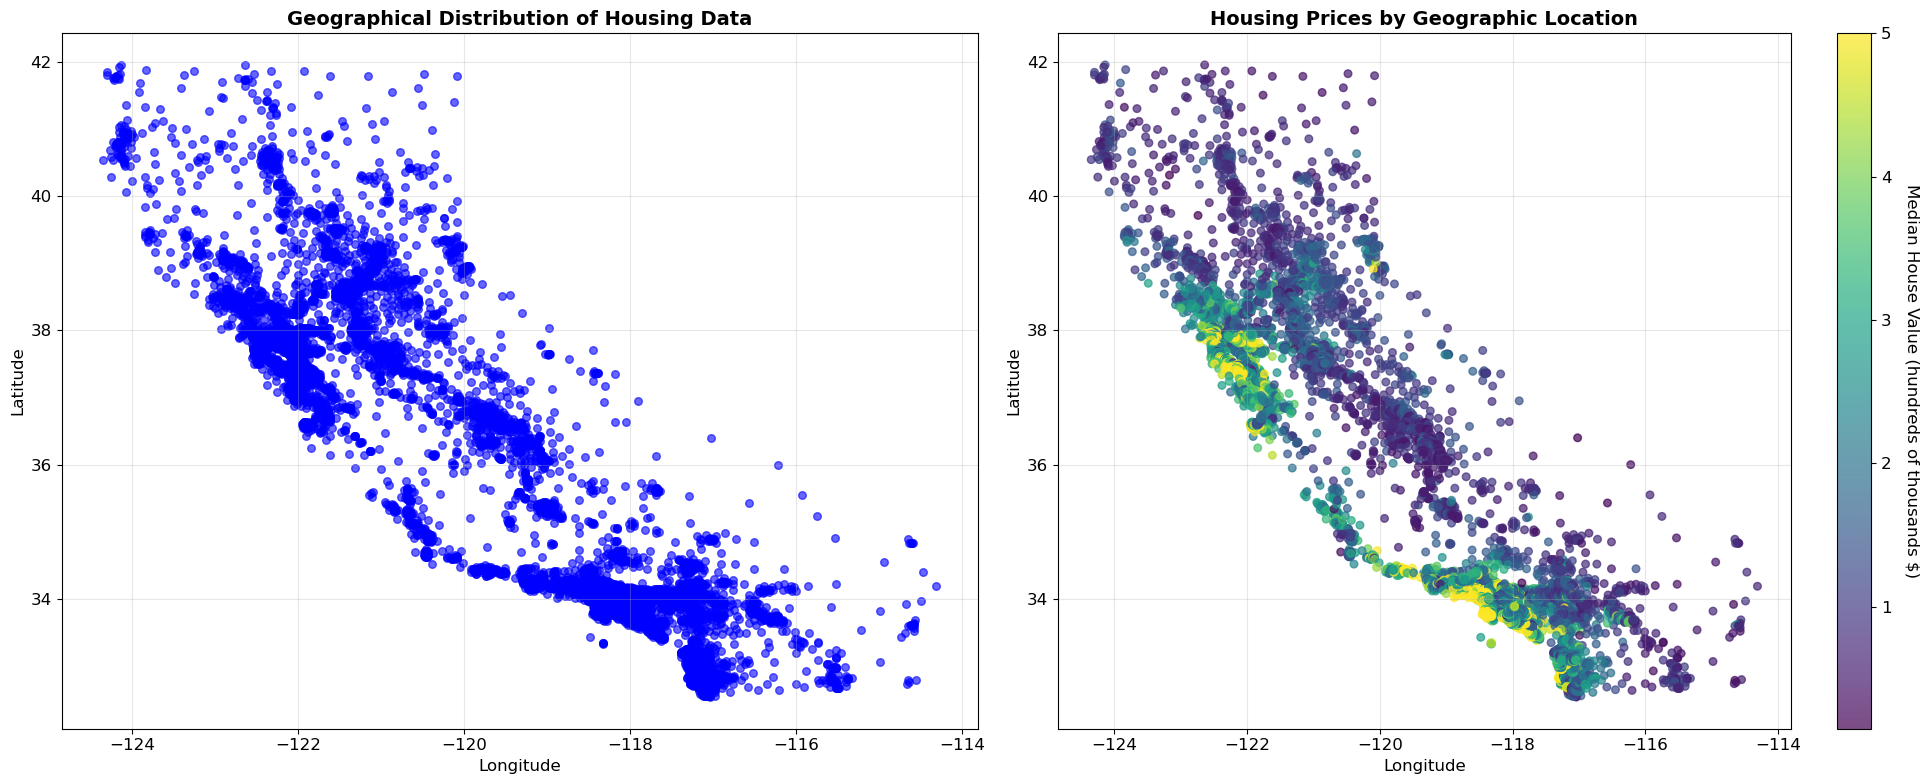


🗺️  Geographical Insights:
Latitude range: 32.54 to 41.95
Longitude range: -124.35 to -114.31
Total data points: 20,640

High-value areas (top 20% by price):
Average Latitude: 35.40
Average Longitude: -119.84
Count: 4,130 areas


In [9]:
# Create geographical scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Basic geographical distribution
scatter1 = ax1.scatter(
    df['Longitude'], 
    df['Latitude'], 
    alpha=0.6, 
    s=30,
    c='blue'
)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)
ax1.set_title('Geographical Distribution of Housing Data', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Geographical distribution colored by target (house values)
scatter2 = ax2.scatter(
    df['Longitude'], 
    df['Latitude'], 
    c=df['target'], 
    cmap='viridis', 
    alpha=0.7, 
    s=30
)
ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)
ax2.set_title('Housing Prices by Geographic Location', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add colorbar for the second plot
cbar = plt.colorbar(scatter2, ax=ax2)
cbar.set_label('Median House Value (hundreds of thousands $)', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Print geographical insights
print("\n🗺️  Geographical Insights:")
print("=" * 30)
print(f"Latitude range: {df['Latitude'].min():.2f} to {df['Latitude'].max():.2f}")
print(f"Longitude range: {df['Longitude'].min():.2f} to {df['Longitude'].max():.2f}")
print(f"Total data points: {len(df):,}")

# Identify high-value areas
high_value_threshold = df['target'].quantile(0.8)
high_value_areas = df[df['target'] >= high_value_threshold]
print(f"\nHigh-value areas (top 20% by price):")
print(f"Average Latitude: {high_value_areas['Latitude'].mean():.2f}")
print(f"Average Longitude: {high_value_areas['Longitude'].mean():.2f}")
print(f"Count: {len(high_value_areas):,} areas")

## 📋 EDA Summary and Key Findings

Based on the exploratory data analysis, we can summarize our key findings:

In [13]:
# Generate EDA summary
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("=" * 50)
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Missing Values: {df.isnull().sum().sum()} (0%)")
print(f"Data Types: All numerical features")

print("\nKey Statistical Insights:")
print("-" * 30)
print(f"Target Variable (House Values):")
print(f"  • Range: ${df['target'].min():.1f}k - ${df['target'].max():.1f}k")
print(f"  • Mean: ${df['target'].mean():.1f}k")
print(f"  • Median: ${df['target'].median():.1f}k")

print(f"\nStrongest Predictors (by correlation):")
target_corr = df.corr()['target'].abs().sort_values(ascending=False)
for i, (feature, corr) in enumerate(target_corr.items()):
    if feature != 'target' and i <= 3:
        print(f"  • {feature}: {corr:.3f}")

print("\nGeographical Coverage:")
print("-" * 25)
print(f"Latitude: {df['Latitude'].min():.2f}° to {df['Latitude'].max():.2f}°")
print(f"Longitude: {df['Longitude'].min():.2f}° to {df['Longitude'].max():.2f}°")
print(f"Coverage: California state")

print("\nData Quality Assessment:")
print("-" * 30)
print("• No missing values detected")
print("• All features are numerical")
print("• No obvious data quality issues")
print("• Dataset is ready for modeling")

EXPLORATORY DATA ANALYSIS SUMMARY
Dataset Shape: 20,640 rows × 9 columns
Missing Values: 0 (0%)
Data Types: All numerical features

Key Statistical Insights:
------------------------------
Target Variable (House Values):
  • Range: $0.1k - $5.0k
  • Mean: $2.1k
  • Median: $1.8k

Strongest Predictors (by correlation):
  • MedInc: 0.688
  • AveRooms: 0.152
  • Latitude: 0.144

Geographical Coverage:
-------------------------
Latitude: 32.54° to 41.95°
Longitude: -124.35° to -114.31°
Coverage: California state

Data Quality Assessment:
------------------------------
• No missing values detected
• All features are numerical
• No obvious data quality issues
• Dataset is ready for modeling
